## May 11, 2020

#### Started with the data capstone project

### 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

######  Import numpy and pandas **

In [4]:
import numpy as np
import pandas as pd


##### ** Import visualization libraries and set %matplotlib inline. **

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### ** Read in the csv file as a dataframe called df **

In [7]:
df = pd.read_csv('911.csv')

##### ** Check the info() of the df **

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


#### ** Check the head of df **

In [18]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Basic Questions

### ** What are the top 5 zipcodes for 911 calls? **

In [37]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

#### ** What are the top 5 townships (twp) for 911 calls? **

In [40]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

##### ** Take a look at the 'title' column, how many unique title codes are there? **

In [34]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

##### ** What is the most common Reason for a 911 call based off of this new column? **

In [46]:
x=df['title'].iloc[0]
x

'EMS: BACK PAINS/INJURY'

In [47]:
x.split(':')

['EMS', ' BACK PAINS/INJURY']

Lets us grab the first element of that reason

In [52]:
x.split(':')[0]

'EMS'

In [49]:
df['Reason']=df['title'].apply(lambda title:title.split(':')[0])

In [50]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
5            EMS
6            EMS
7            EMS
8            EMS
9        Traffic
10       Traffic
11       Traffic
12       Traffic
13       Traffic
14       Traffic
15       Traffic
16           EMS
17           EMS
18           EMS
19       Traffic
20       Traffic
21       Traffic
22          Fire
23       Traffic
24       Traffic
25           EMS
26           EMS
27          Fire
28       Traffic
29       Traffic
          ...   
99462        EMS
99463        EMS
99464        EMS
99465        EMS
99466        EMS
99467        EMS
99468       Fire
99469       Fire
99470        EMS
99471        EMS
99472        EMS
99473        EMS
99474        EMS
99475    Traffic
99476        EMS
99477        EMS
99478    Traffic
99479        EMS
99480        EMS
99481        EMS
99482    Traffic
99483        EMS
99484       Fire
99485    Traffic
99486    Traffic
99487    Traffic
99488    Traffic
99489        E

##### ** What is the most common Reason for a 911 call based off of this new column? **

In [60]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

##### ** Now use seaborn to create a countplot of 911 calls by Reason. **

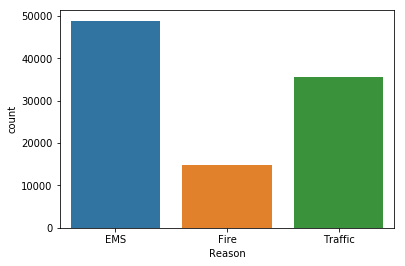

In [61]:
sns.countplot(x='Reason',data=df)

##### ** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

lets us grab the first element in the time column

In [64]:
df['timeStamp'].iloc[0] # looks  like a string
# lets confrom that whether it is a dtring or not

'2015-12-10 17:40:00'

In [65]:
type(df['timeStamp'].iloc[0])

str

#### ** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [68]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [71]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [72]:
time = df['timeStamp'].iloc[0]

In [73]:
time

Timestamp('2015-12-10 17:40:00')

In [74]:
time.hour

17

In [75]:
time.minute

40

In [76]:
time.second

0

In [81]:
time.year


2015

In [80]:
time.month

12

In [82]:
df['Hour']=df['timeStamp'].apply(lambda time:time.hour)

In [92]:
df['Hour'].head()  #just like to se the sample

0    17
1    17
2    17
3    17
4    17
Name: Hour, dtype: int64

### Exact sme things for the months and the days of the week

In [84]:
df['Month']=df['timeStamp'].apply(lambda time:time.month)

In [91]:
df['Month'].head()#just like to se the sample

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [95]:
df['Day of week']=df['timeStamp'].apply(lambda time:time.dayofweek)

In [96]:
df['Day of week'].head()#just like to se the sample

0    3
1    3
2    3
3    3
4    3
Name: Day of week, dtype: int64

###### Now letus see the original df file whether the new columns are added to it or not

In [97]:
df.head() # it looks ok

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Days,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,3


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [100]:
type(df['Day of week'].iloc[0])

numpy.int64

In [101]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [102]:
df['Day of week']=df['Day of week'].map(dmap)

In [103]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Days,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,Thu


#### ** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

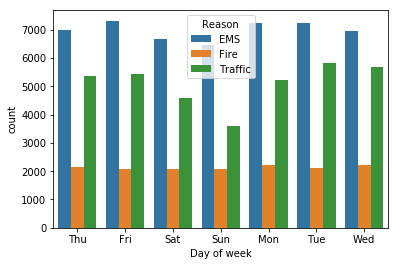

In [106]:
sns.countplot(x='Day of week',data=df,hue='Reason')

###### can provide a palette argument

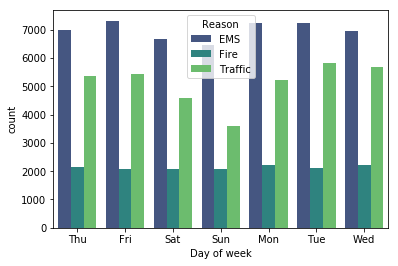

In [107]:
sns.countplot(x='Day of week',data=df,hue='Reason',palette='viridis')

###### Now plotletus put the legend outside of the 

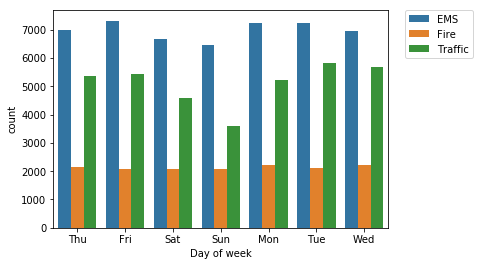

In [108]:
sns.countplot(x='Day of week',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

### **Now do the same for Month:**

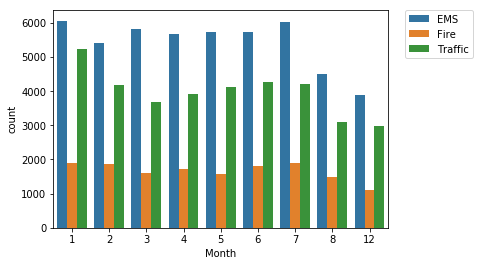

In [109]:
sns.countplot(x='Month',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [112]:
byMonth = df.groupby('Month').count()

In [114]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Days,Day of week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


 We counted evrery instance of the columns by the montwh or  we are ging to go ahead and do is notice that some of the counts are different depending on the actual column value.
for example zip column has different avlues(11527)  but row 1n has all other values are same. That means some of the values are missing when you aggreagte by month.

It's just choose the  latitude column as our value for the aggreagte count.we will go ahead and assume that if 
we had the latitude of the  call actually took place

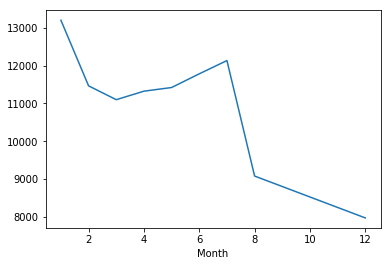

In [116]:
byMonth['lat'].plot()

And here we have our month and now we are actually been able to fill in some of that missing information throgh a essentiallyn a fit between points at 8 and points at 12 which can be seen by the down curve in  that region.

No handles with labels found to put in legend.


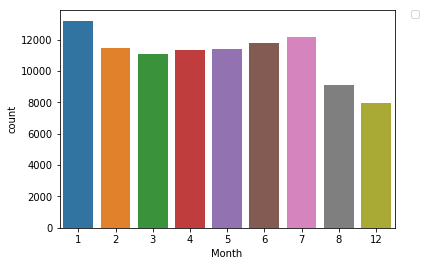

In [117]:
sns.countplot(x='Month',data=df)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

/home/bishnu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


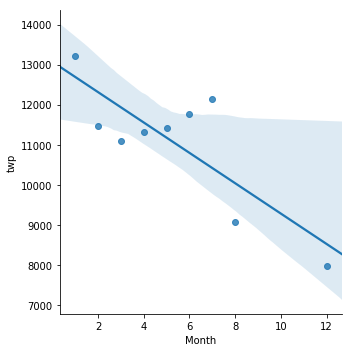

In [125]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

shaded area is the  error which increase toward the month 11 and 12.
The fit goes up to 14 but we ahve only 12 months so the linear fit model is not a perfect fit

##### **Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [162]:
#df['Date'] = df['timeStamp'].iloc[0].date()
# can use alambda  function in the following way
t= df['timeStamp'].iloc[0]
df['Date'] = df['timeStamp'].apply(lambda t:t.date())


In [163]:
df['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

In [164]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Days,Day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,Thu,2015-12-10


##### ** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [165]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Days,Day of week
Date,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447


From the above graph we are missing some information. For example 2015-12-12  total 403 calls in lat,lng and desc but only 333 in zip

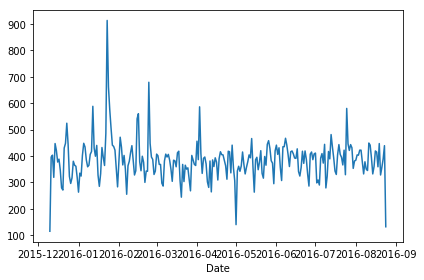

In [169]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

### ** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [181]:
#t1= df['title'].iloc[0].split(':')[1]

In [178]:
#df.groupby('Date').count()['lat'].plot()

' BACK PAINS/INJURY'

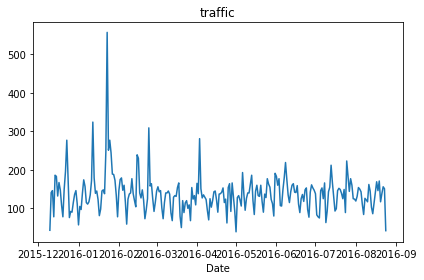

In [184]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('traffic')
plt.tight_layout()

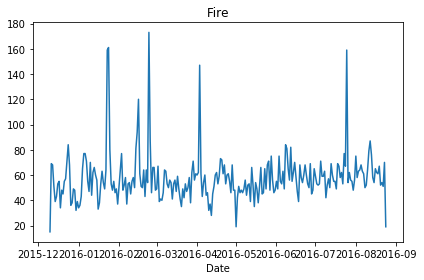

In [185]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

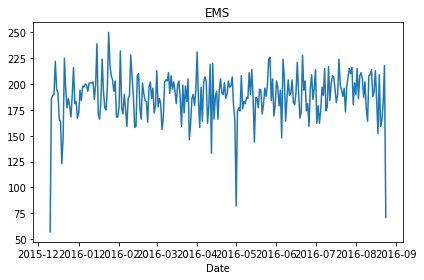

In [187]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

###### back to the cluster and heatmap we need our data to be in the matrix form where every single cell converts back to a value

In [191]:
dayHour=df.groupby(by=['Day of week','Hour']).count()['Reason'].unstack()
# now will be in the matrix form
# but can use the pivot table of pandas will be easy method

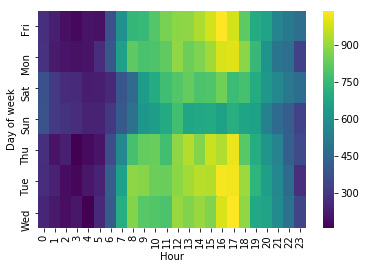

In [193]:
sns.heatmap(dayHour,cmap='viridis')

#### ** Now create a clustermap using this DataFrame. **

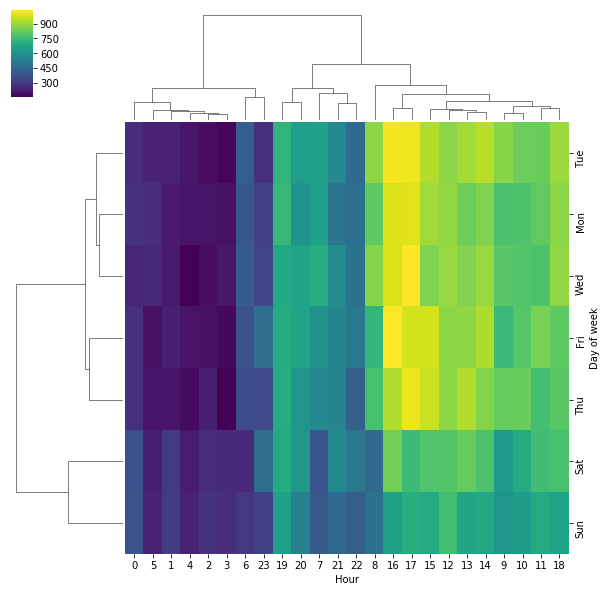

In [194]:
sns.clustermap(dayHour,cmap='viridis')

##### ** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [198]:
dayMonth=df.groupby(by=['Day of week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


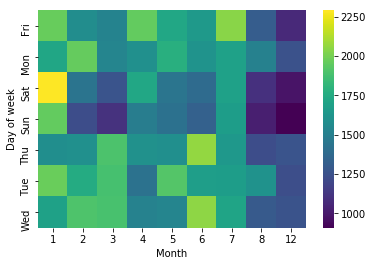

In [199]:
sns.heatmap(dayMonth,cmap='viridis')

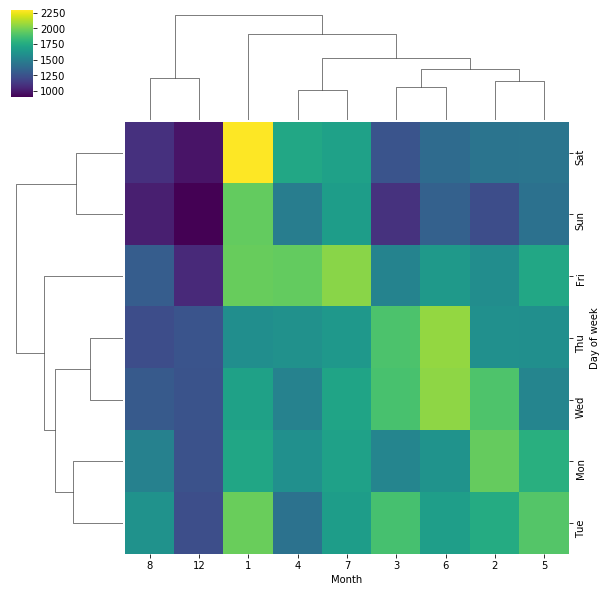

In [200]:
sns.clustermap(dayMonth,cmap='viridis')

### Second Project

#### Message from udemy

Bank Data

Hi everyone,

In case you have issues getting the data because of your geographical location or Firewalls, I've uploaded a pickle file to this lecture as a resource. Its called "all_banks", once you've downloaded it, just use the following command to read it:

df = pd.read_pickle('all_banks') 

Thanks!

Jose
Resources for this lecture

    Download all_banks pickle file from this link

## Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [211]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

###### ** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [212]:
start=datetime.datetime(2006,1,1) #year month day is the starting date
end=datetime.datetime(2016,1,1) #End date

#### Then we ahve to do is figure out the tickers for the various banks such as the bank of America

In [217]:
# Bank of Amereica
BAC = data.DataReader("BAC", 'yahoo', start, end) # google doesn't work

In [218]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.298687
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.923801
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.968796
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.916302
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.938789


In [ ]:
# The above table has the following  information
# It is a data frame with date as index,opening price, high price, low price, the closing price and then the volume
# essentially translates the prices to the prices of the  stocks of the opening price of 
# the stock on a date and so on

##### 'google' means use the google finance. But can be sued tthe yahoo finance

###### Now repeat the same process for the other banks

In [224]:
# CitiGroup
C = data.DataReader("C", 'yahoo', start, end) 
# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)


###### Now we wanted to create the list of the ticker symbols as strings in the alphabetical order order call

In [227]:
tickers=['BAC','C','GS','JPM','MS','WFC']

###### ** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [229]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [230]:
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.298687   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.923801   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.968796   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.916302   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.938789   

                     C                                        ...      \
                  High         Low        Open       Close    ...       
Date                                                          ...       
2006-01-03  493.799988  481.100006  490.000000  492.899994    ...       
2006-01-04  491.000000  483.500000  488.600006  483.799988    ...       
2006-01-05  487.799988  484.000000  484.399994  486.200012    ...       
2006-01-06  489.000000  482.000000  488.799988  486.200012    ...       
2006-01-09  487.399994  483.000000  486.000000  483.899994    ...       

                   MS                                         WFC             \
                 Open      Close     Volume  Adj Close       High        Low   
Date                                                                           
2006-01-03  57.169998  58.310001  5377000.0  37.429329  31.975000  31.195000   
2006-01-04  58.700001  58.349998  7977800.0  37.455013  31.820000  31.365000   
2006-01-05  58.549999  58.509998  5778000.0  37.557716  31.555000  31.309999   
2006-01-06  58.770000  58.570000  6889800.0  37.596241  31.775000  31.385000   
2006-01-09  58.630001  59.189999  4144500.0  37.994202  31.825001  31.555000   

                                                         
                 Open      Close      Volume  Adj Close  
Date                                                     
2006-01-03  31.600000  31.900000  11016400.0  20.408512  
2006-01-04  31.799999  31.530001  10870000.0  20.171795  
2006-01-05  31.500000  31.495001  10158000.0  20.149401  
2006-01-06  31.580000  31.680000   8403800.0  20.267757  
2006-01-09  31.674999  31.674999   5619600.0  20.264565  

[5 rows x 36 columns]

##### ** Set the column name levels (this is filled out for you):**`

In [232]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [233]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      \
Stock Info   Adj Close        High         Low        Open       Close   
Date                                                                     
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994   

Bank Ticker    ...             MS                                         WFC  \
Stock Info     ...           Open      Close     Volume  Adj Close       High   
Date           ...                                                              
2006-01-03     ...      57.169998  58.310001  5377000.0  37.429329  31.975000   
2006-01-04     ...      58.700001  58.349998  7977800.0  37.455013  31.820000   
2006-01-05     ...      58.549999  58.509998  5778000.0  37.557716  31.555000   
2006-01-06     ...      58.770000  58.570000  6889800.0  37.596241  31.775000   
2006-01-09     ...      58.630001  59.189999  4144500.0  37.994202  31.825001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2006-01-03   31.195000  31.600000  31.900000  11016400.0  20.408512  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  20.171795  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  20.149401  
2006-01-06   31.385000  31.580000  31.680000   8403800.0  20.267757  
2006-01-09   31.555000  31.674999  31.674999   5619600.0  20.264565  

[5 rows x 36 columns]

##### EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.



##### ** What is the max Close price for each bank's stock throughout the time period?**

In [234]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [236]:
returns=pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [237]:
for tick in tickers: 
    returns[tick+'Return']=bank_stocks[tick]['Close'].pct_change()

In [238]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


###### The very first value has NaN or because  because you can't get a percent return on very first day because there is nothing in the past to compare

##### ** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

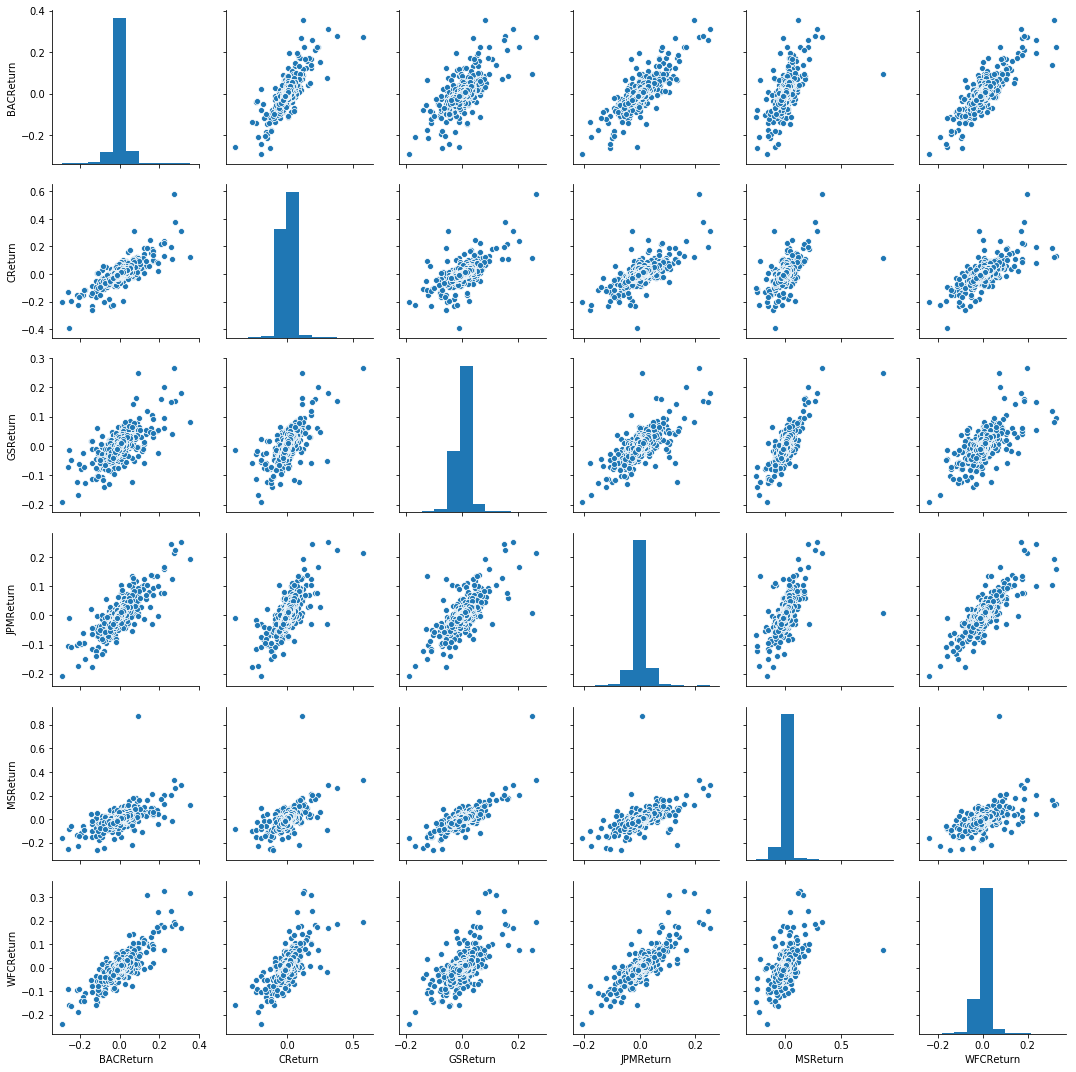

In [244]:
import seaborn as sns
sns.pairplot(returns[1:])

###### * See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [249]:
returns.min() # sigle day return value minimum

BACReturn   -0.289694
CReturn     -0.390244
GSReturn    -0.189596
JPMReturn   -0.207274
MSReturn    -0.258929
WFCReturn   -0.238223
dtype: float64

##### We really wants the when this really happednd

##### There are couple of days for that

In [251]:
returns['BACReturn'].argmin() # argmin will return the time stamp

/home/bishnu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  """Entry point for launching an IPython kernel.


Timestamp('2009-01-20 00:00:00')

###### You could that for the every single column or pandaas also allows you to do this across the entire dataframe by just calling the idxmin() 

In [252]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [253]:
returns.idxmax() # will give the biggest single day gains

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

##### ** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

###### ** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [254]:
returns.std() # high standard deviation means large up and down
# which means there is some kind of risk

BACReturn    0.036647
CReturn      0.038672
GSReturn     0.025390
JPMReturn    0.027667
MSReturn     0.037819
WFCReturn    0.030238
dtype: float64

In [257]:
returns.ix['2015-01-01': '2015-12-31'].std()

/home/bishnu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

#### ** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/home/bishnu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


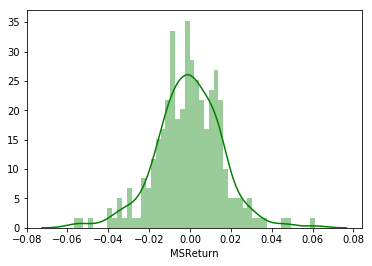

In [261]:
sns.distplot(returns.ix['2015-01-01': '2015-12-31']['MSReturn'],color='green',bins=50)

###### ** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/home/bishnu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


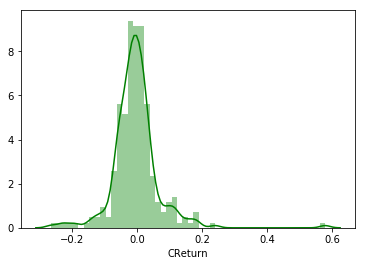

In [263]:
sns.distplot(returns.ix['2008-01-01': '2008-12-31']['CReturn'],color='green',bins=50)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

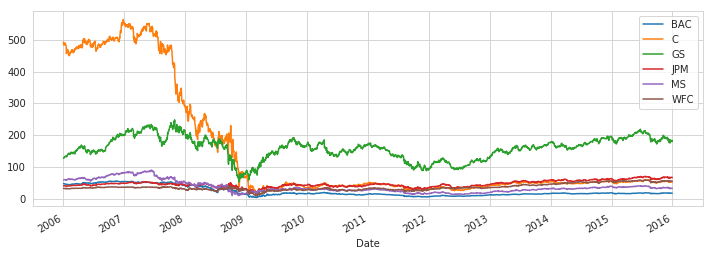

In [265]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

### Lets see how to do with the cross-section

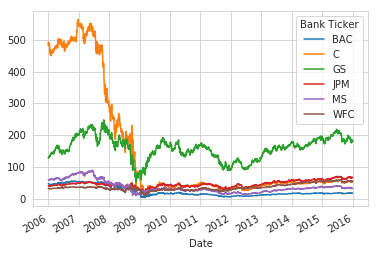

In [266]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

##### Now lets see the plotly way to do this

In [268]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

/home/bishnu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

/home/bishnu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



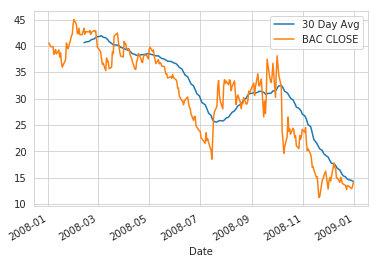

In [270]:
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

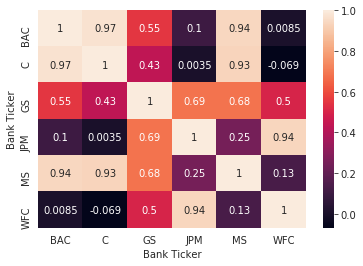

In [271]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

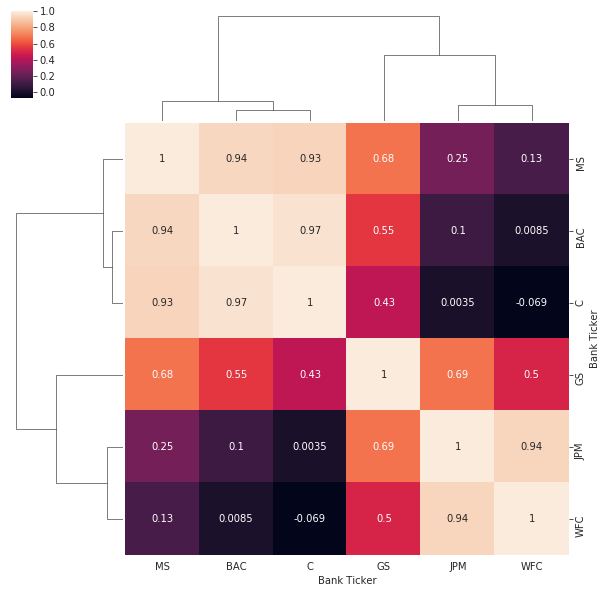

In [272]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

## Finance Project Solutions Part 3(Opptional)

In [274]:
close_corr=bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

In [278]:
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

###### ** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [281]:
bac15=BAC[['Open','High','Low','Close']].ix['2015-01-01':'2016-01-01']

/home/bishnu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [282]:
bac15.iplot(kind='candle')

##### NOte: the candle plot is the for the financial analsis.
It basically tells you whether or not the stoccccck went  up or down that day based of color. So, green color is increasing, red is decreasing and then it kind of tels you opening high and  the closing price 

###### The next plot is the sma plot which is the simple moving average

In [283]:
MS['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,53])

/home/bishnu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



###### Bollinger Band plot

In [284]:
BAC['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll')

/home/bishnu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

